# Convergent Cross Mapping Vegetation/Climate across different land cover types in East Africa 

In [5]:
%%html

<style>
    .jp-OutputArea-child {
        display: inline-block;
    }
</style>

In [3]:
from pyEDM import *
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from labellines import labelLine, labelLines
import re
import itertools
import seaborn as sns
sns.set(style='ticks', color_codes = True)
import os
from tqdm import tqdm
import datetime
import rasterio
from rasterio.plot import show
import xarray as xr
from sklearn.preprocessing import StandardScaler

In [4]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# #Here is the main directory
# OROMIA_TS_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_normalized/'
# #save figures to this folder
# FIGURES = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Figures/'
# SMOOTHED_DIR = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/smoothed/'

# #Directory for seasonal decomposed time series
# OROMIA_TS_DS = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/Final_TS/oromia_df_seasonaldecomposed/'


In [10]:
EAST_AFRICA_FINAL = '/home/rgreen/DroughtEDM/Data/EA_TS_16/EastAfrica_Final/All_Vars/'

In [5]:
def ccm_vars_plot(in_dir, file, E, tau, Tp, libsize, sample, title):
    '''
    This function evaluates the cross map skill between two variables for a given land cover and area.
    
    Args:
    in_dir = path to directory of time series datasets
    lc = filename
    train = number of points in the time series to use for training, range separated by a space
    test = number of points in the time series to use for testing, range separated by a space
    title = label for figure of the area and land cover tested
    
    '''
    column_names = list(itertools.combinations(['NDVI', 'SM', 'P', 'LST', 'refET'],2))
    for i in column_names: 
        ccm_result = CCM(pathIn = in_dir, dataFile = file, E = E, tau = tau, Tp = Tp, libSizes = libsize, sample = sample, columns = i[0], target = i[1], verbose = True, showPlot = False)
        #ccm_result2 = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, columns = i[1], target = i[0], showPlot = False)
        #fig, (ax1, ax2) = plt.subplots(1,2)
        fig = plt.figure()
        plt.plot(ccm_result.LibSize, ccm_result[str(i[0])+':'+str(i[1])], label = i[0] + r'$\rightarrow$' + i[1])
        plt.plot(ccm_result.LibSize, ccm_result[str(i[1])+':'+str(i[0])], label = i[1] + r'$\rightarrow$' + i[0])
        plt.xlabel('Library Size')
        plt.ylabel('Correlation ' r'$\rho$')
        plt.ylim(0, 1, 0.1)
        plt.title('Convergent Cross Mapping ' + title)
        #labelLines(plt.gca().get_lines(), zorder=2.5)
        plt.legend(loc = 'lower right', fontsize = 8, title = 'Cross Mapped Variables \n (Original' + r'$\rightarrow$' + 'Target)')
        plt.show()

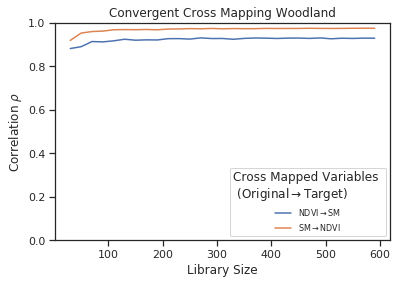

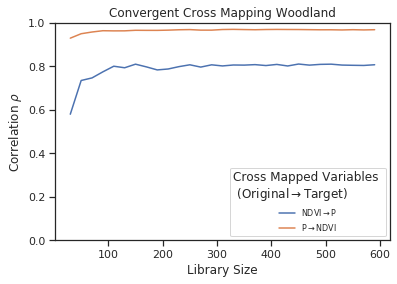

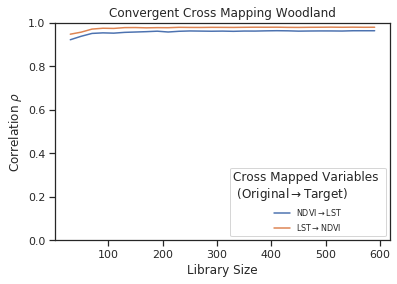

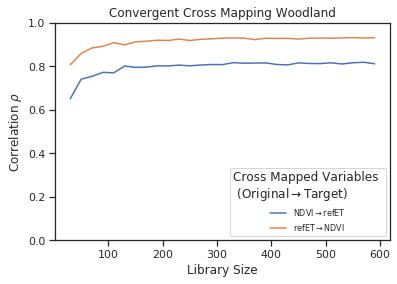

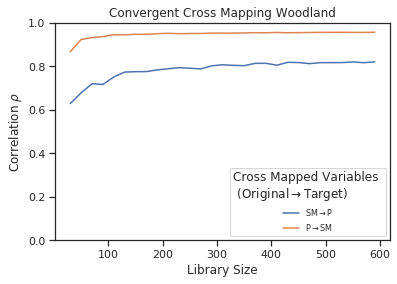

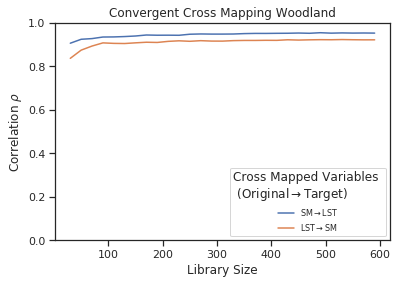

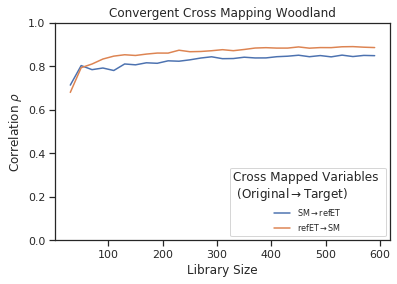

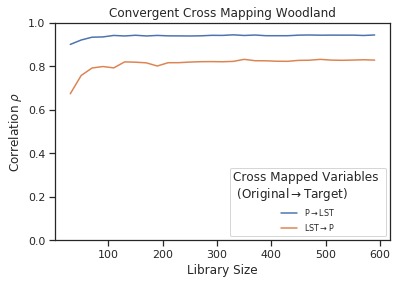

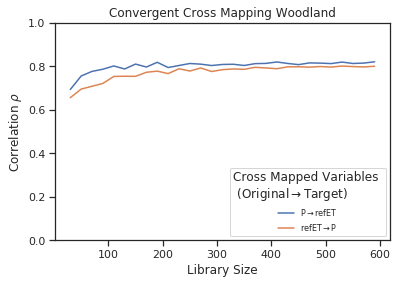

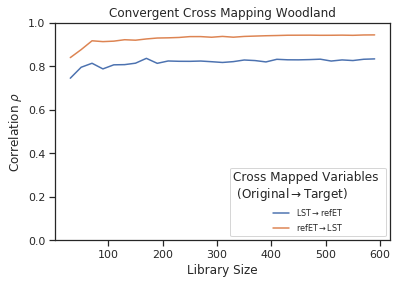

In [103]:
ccm_vars_plot(EAST_AFRICA_FINAL, 'eastafrica_ea_full_broadleaf_open_5.csv', 10, -1, 0, '10 600 20', 10, 'Woodland')

In [12]:
#ccm_vars_plot(OROMIA_TS_DS, 'oromia_croplands_df_ds.csv', 10, -1, 0, '10 480 20', 10, 'Oromia Croplands')

In [32]:
#only run if you need to it taks a long time!!!
#increasing the sample size will smooth the plots but run slower


#ccm_vars_plot (OROMIA_TS_DS, 'oromia_croplands_df_ds.csv', 10, -1, 0, '10 480 20', 500, 'Oromia Croplands')

In [11]:
def ccm_vars_df(in_dir, file, E, tau, Tp, libsize, sample, title):
    '''
    This function creates dataframes of CCM results
    
    '''
#     column_names = list(itertools.combinations(['NDVI', 'SM', 'TMP', 'P', 'LST', 'refET'],2))
    column_names = list(itertools.combinations(['NDVI', 'SM', 'P', 'LST', 'refET'],2))
    output = pd.DataFrame(list(range(1,26)), columns=['LibSize'])
     
    
    for i in column_names: 
        ccm_result1 = CCM(pathIn = in_dir, dataFile = file, E = E, tau = tau, Tp = Tp, libSizes = libsize, sample = sample, columns = i[0], target = i[1], verbose = True, showPlot = False)
        ccm_result2 = CCM(pathIn = in_dir, dataFile = file, E = E, tau = tau, Tp = Tp, libSizes = libsize, sample = sample, columns = i[1], target = i[0], verbose = True, showPlot = False)
        #ccm_result2 = EmbedDimension(pathIn = in_dir, dataFile = file, lib = train, pred = test, columns = i[1], target = i[0], showPlot = False)
        #fig, (ax1, ax2) = plt.subplots(1,2)
        col1 = i[0] + r'$\rightarrow$' + i[1]
        col2 = i[1] + r'$\rightarrow$' + i[0]
        output[col1] = ccm_result1[str(i[0])+':'+str(i[1])]
        output[col2] = ccm_result2[str(i[1])+':'+str(i[0])] 
        
    return output 
        
#         plt.plot(ccm_result.LibSize, ccm_result[str(i[0])+':'+str(i[1])], label = i[0] + r'$\rightarrow$' + i[1])
#         plt.plot(ccm_result.LibSize, ccm_result[str(i[1])+':'+str(i[0])], label = i[1] + r'$\rightarrow$' + i[0])
        

In [12]:
ccm_combos = ccm_vars_df(EAST_AFRICA_FINAL, 'eastafrica_ea_full_broadleaf_open_5.csv', 10, -1, 0, '10 600 20', 10, 'Woodland')
ccm_combos

,LibSize,NDVI$\rightarrow$SM,SM$\rightarrow$NDVI,NDVI$\rightarrow$P,P$\rightarrow$NDVI,NDVI$\rightarrow$LST,LST$\rightarrow$NDVI,NDVI$\rightarrow$refET,refET$\rightarrow$NDVI,SM$\rightarrow$P,...,SM$\rightarrow$LST,LST$\rightarrow$SM,SM$\rightarrow$refET,refET$\rightarrow$SM,P$\rightarrow$LST,LST$\rightarrow$P,P$\rightarrow$refET,refET$\rightarrow$P,LST$\rightarrow$refET,refET$\rightarrow$LST
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0.885121,0.929322,0.628857,0.927582,0.895118,0.935994,0.700342,0.839174,0.496835,...,0.888946,0.830682,0.736654,0.730423,0.885751,0.650499,0.791015,0.567115,0.750382,0.828987
2,3,0.893122,0.951623,0.727765,0.948655,0.944170,0.962069,0.769001,0.865668,0.666374,...,0.918090,0.880805,0.766995,0.801001,0.920672,0.756240,0.806121,0.687779,0.769166,0.881070
3,4,0.915385,0.961406,0.764298,0.961021,0.947759,0.973075,0.785599,0.892340,0.703455,...,0.930407,0.917662,0.773607,0.828533,0.938724,0.804021,0.779925,0.719320,0.793571,0.914551
4,5,0.908185,0.962820,0.769421,0.961878,0.955619,0.973494,0.779835,0.902030,0.748180,...,0.937684,0.900993,0.777491,0.844537,0.932251,0.795348,0.799956,0.730902,0.801490,0.909362
5,6,0.918705,0.964705,0.786619,0.961119,0.952697,0.974300,0.793976,0.906835,0.764810,...,0.935298,0.903781,0.795982,0.852935,0.941619,0.810308,0.787187,0.740099,0.810496,0.914958
6,7,0.920307,0.968780,0.795030,0.969576,0.956652,0.976163,0.789583,0.916720,0.760480,...,0.934398,0.906476,0.819871,0.852757,0.939545,0.803648,0.791411,0.768168,0.821197,0.923966
7,8,0.918204,0.967777,0.802371,0.965948,0.960889,0.977660,0.796723,0.910327,0.781213,...,0.940669,0.910793,0.811879,0.847647,0.939757,0.808467,0.781756,0.780100,0.818560,0.926381
8,9,0.929739,0.969399,0.791367,0.965778,0.957509,0.977171,0.800425,0.917942,0.767981,...,0.942989,0.911794,0.811799,0.864522,0.937606,0.800046,0.803065,0.782360,0.818457,0.925928
9,10,0.922266,0.970932,0.789223,0.967236,0.957896,0.977572,0.801091,0.912225,0.777785,...,0.941230,0.915263,0.811240,0.859124,0.938091,0.824282,0.815392,0.758360,0.817763,0.925437


In [13]:
def max_ccm(df):
    
    '''
    This function finds the maximum value in every ccm combination across the library size. 
    
    Args:
    df = dataframe of all ccm combination rho outputs
    
    '''        
    columns = df.columns[1:]
    #output = pd.DataFrame(list(range(1,31)), columns=['xmap'])
    output = []
    
    for i in columns:
        ccm_rho = df[i]
        max_rho = ccm_rho.max()
        output.append(max_rho)
    return output

def diff_max_ccm(max_list):
    '''
    This function takes the difference between the maximum values of each ccm combination and creates a new dataframe
    
    Args:
    max_list = list of maximum values from ccm outputs
    
    '''        
    
    diff_df = pd.DataFrame()
    var_names = list(itertools.combinations(['NDVI', 'SM', 'TMP', 'P', 'LST', 'refET'],2))
    it = iter(max_list)
    
    diff_list = []
    for a, b in zip(it, it):
        diff1 = a-b
        diff2 = b-a
        diff_list.append(diff1)
        diff_list.append(diff2)
        diff_df['xmap'] = list(ccm_combos.columns[1:])
    
    diff_df['xmap'] = list(ccm_combos.columns[1:])
    diff_df['max_diff']= diff_list

    return diff_df
        

def last_ccm(df):
    
    '''
    This function finds the maximum value in every ccm combination across the library size. 
    
    Args:
    df = dataframe of all ccm combination rho outputs
    
    '''        
    columns = df.columns[1:]
    #output = pd.DataFrame(list(range(1,31)), columns=['xmap'])
    output = []
    
    for i in columns:
        ccm_rho = df[i]
        
        last_rho = ccm_rho.iloc[-1]
        output.append(last_rho)
    return output

def diff_last_ccm(last_list):
    '''
    This function takes the difference between the maximum values of each ccm combination and creates a new dataframe
    
    Args:
    max_list = list of maximum values from ccm outputs
    
    '''        
    
    diff_df = pd.DataFrame()
    var_names = list(itertools.combinations(['NDVI', 'SM', 'P', 'LST', 'refET'],2))
    it = iter(last_list)
    
    diff_list = []
    for a, b in zip(it, it):
        diff1 = abs(a-b)
        diff2 = abs(b-a)
        diff_list.append(diff1)
        diff_list.append(diff2)
        diff_df['xmap'] = list(ccm_combos.columns[1:])
    
    diff_df['xmap'] = list(ccm_combos.columns[1:])
    diff_df['diff']= diff_list

    return diff_df
        


        
        

In [14]:
ccm_last_list = last_ccm(ccm_combos)

In [15]:
ccm_max_list = max_ccm(ccm_combos)

In [16]:
lastdiff_combos = diff_last_ccm(ccm_last_list)

In [17]:
def get_target_var(xmap_string):
    return xmap_string.split("$\\rightarrow$",1)[0]
def get_causal_var(xmap_string):
    return xmap_string.split("$\\rightarrow$",1)[1]


In [18]:
lastdiff_combos_sorted = lastdiff_combos.sort_values('xmap')
lastdiff_combos_sorted['causal_var'] = lastdiff_combos_sorted['xmap'].map(get_causal_var)
lastdiff_combos_sorted['target_var'] = (lastdiff_combos_sorted['xmap'].map(get_target_var))

In [19]:
lastdiff_combos_sorted

,xmap,diff,causal_var,target_var
5,LST$\rightarrow$NDVI,0.016935,NDVI,LST
15,LST$\rightarrow$P,0.113485,P,LST
11,LST$\rightarrow$SM,0.029958,SM,LST
18,LST$\rightarrow$refET,0.116972,refET,LST
4,NDVI$\rightarrow$LST,0.016935,LST,NDVI
2,NDVI$\rightarrow$P,0.154777,P,NDVI
0,NDVI$\rightarrow$SM,0.042784,SM,NDVI
6,NDVI$\rightarrow$refET,0.109228,refET,NDVI
14,P$\rightarrow$LST,0.113485,LST,P
3,P$\rightarrow$NDVI,0.154777,NDVI,P


In [20]:
# maxdiff_combos_sorted = maxdiff_combos.sort_values('xmap')
# maxdiff_combos_sorted['causal_var'] = (maxdiff_combos_sorted['xmap'].map(get_causal_var))
# maxdiff_combos_sorted['target_var'] = (maxdiff_combos_sorted['xmap'].map(get_target_var))

# #maxdiff_combos_sorted.join(maxdiff_combos_sorted.xmap.apply(lambda s: pd.Series({'target_var':s.split('rightarrow$', 1)[1]})))
#                                                                                                       #', 'causal_var':s-1})))'
# #maxdiff_combos_sorted.insert(1, 'target_var', ['LST']*5 + ['NDVI']*5 + ['P']*5 + ['SM']*5 + ['TMP']*5 + ['refET']*5)
# #maxdiff_combos_sorted['causal_var'] = maxdiff_combos_sorted.apply(lambda row: add())

# #maxdiff_combos_sorted.join(maxdiff_combos_sorted['xmap'].apply(lambda s: pd.Series({'causal_var':s.split("rightarrow$",1)[1]})))
# #maxdiff_combos_sorted.insert(2, 'causal_var', (maxdiff_combos_sorted['xmap'].values.split("rightarrow$",1)[1]))
# maxdiff_combos_sorted

# #maxdiff_combos[maxdiff_combos['xmap'].str.startswith('NDVI')]

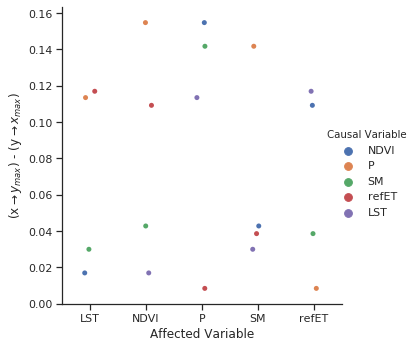

In [21]:
#plt1 = 
ax = sns.catplot(x='target_var', y='diff', hue = 'causal_var', data = lastdiff_combos_sorted)
ax.set(xlabel = 'Affected Variable', ylabel = '(x$\\rightarrow$$y_{max}$) - (y$\\rightarrow$$x_{max}$)')
ax._legend.set_title('Causal Variable')

# for line in range(0,df.shape[0]):
#      plt1.text(maxdiff_combos_sorted.target_var[line]+0.2, maxdiff_combos_sorted.max_diff[line], maxdiff_combos_sorted.xmap[line], horizontalalignment='left', size='medium', color='black', weight='semibold')
        
# sns.plt.show()

In [22]:
lastdiff_combos_sorted

,xmap,diff,causal_var,target_var
5,LST$\rightarrow$NDVI,0.016935,NDVI,LST
15,LST$\rightarrow$P,0.113485,P,LST
11,LST$\rightarrow$SM,0.029958,SM,LST
18,LST$\rightarrow$refET,0.116972,refET,LST
4,NDVI$\rightarrow$LST,0.016935,LST,NDVI
2,NDVI$\rightarrow$P,0.154777,P,NDVI
0,NDVI$\rightarrow$SM,0.042784,SM,NDVI
6,NDVI$\rightarrow$refET,0.109228,refET,NDVI
14,P$\rightarrow$LST,0.113485,LST,P
3,P$\rightarrow$NDVI,0.154777,NDVI,P


In [23]:
ndvi_diffs = lastdiff_combos_sorted[lastdiff_combos_sorted.xmap.str.endswith(('NDVI'))]

In [24]:
ndvi_diffs

,xmap,diff,causal_var,target_var
5,LST$\rightarrow$NDVI,0.016935,NDVI,LST
3,P$\rightarrow$NDVI,0.154777,NDVI,P
1,SM$\rightarrow$NDVI,0.042784,NDVI,SM
7,refET$\rightarrow$NDVI,0.109228,NDVI,refET


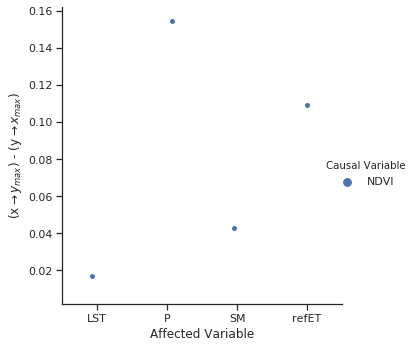

In [25]:
ax = sns.catplot(x='target_var', y='diff', hue = 'causal_var', data = ndvi_diffs)
ax.set(xlabel = 'Affected Variable', ylabel = '(x$\\rightarrow$$y_{max}$) - (y$\\rightarrow$$x_{max}$)')
ax._legend.set_title('Causal Variable')

In [26]:
np.random.random(4)

array([0.74506831, 0.84897939, 0.14798484, 0.53402866])

In [27]:
ndvi_diffs['diff'].astype(float)

5    0.016935
3    0.154777
1    0.042784
7    0.109228
Name: diff, dtype: float64

<BarContainer object of 4 artists>

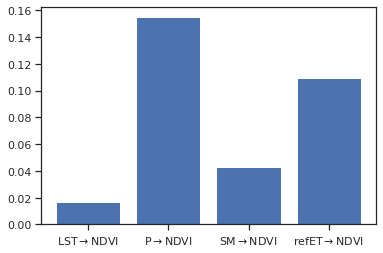

In [28]:
plt.bar(ndvi_diffs.xmap, ndvi_diffs['diff'].astype(float))

# Pixelwise CCM

In [9]:
def generate_dekads(start, end):
    '''
    Generates list of timestamps of dekads between two dates
    
    Parameters
    ----------
    start : pd.datetime object
        Start date of list
    end : pd.datetime object
        end date of list
    '''
    
    dtrange = pd.date_range(start, end)
    days = list(range(len(dtrange))) #length of dtrange
    daysDF = pd.DataFrame({'Days': days}, index=dtrange)
    d = daysDF.index.day - np.clip((daysDF.index.day-1) // 10, 0, 2)*10 - 1 
    dekaddates = daysDF.index.values - np.array(d, dtype="timedelta64[D]")
    dekads = daysDF.groupby(dekaddates).mean()
    dekads = dekads.index
    
    return dekads

In [10]:
start = pd.datetime(2002,7,1)
end = pd.datetime(2019,4,30)

dekads = generate_dekads(start, end)

In [11]:
broadleaf_open_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/VariablesByLandCover16/variables_broadleaf_open/'
crop_irr_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/VariablesByLandCover16/variables_crop_irr/'
crop_rain_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/VariablesByLandCover16/variables_crop_rain/'
grassland_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/VariablesByLandCover16/variables_grassland/'
shrubland_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/VariablesByLandCover16/variables_shrubland/'

In [12]:
broadleaf_open_anom_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/VariablesByLandCover16/variables_broadleaf_open_anom/'
crop_irr_anom_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/VariablesByLandCover16/variables_crop_irr_anom/'
crop_rain_anom_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/VariablesByLandCover16/variables_crop_rain_anom/'
grassland_anom_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/VariablesByLandCover16/variables_grassland_anom/'
shrubland_anom_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/VariablesByLandCover16/variables_shrubland_anom/'

In [13]:
precip_anom_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/CHIRPS/Anomaly/'
temp_anom_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/LST/Anomaly/'
ndvi_anom_dir = '/home/rgreen/tana-spin/rgreen/DroughtEDM/Data/eMODIS_NDVI/Anomaly/'

In [14]:
def pixelwise_ts_table(in_dir, keyword):
    
    '''
    This function searches through the file directory and creates a dataframe of pixel values over time from rasters
    based on a given keyword describing the environmental variable of interest to generate a raster time series stack 
    
   In the output dataframe, columns are each pixel extracted from the raster (read squentially into a list)
   and rows are the same pixel over time (dekads going down)
    
    Args:
    - in_dir: path to the input directory
    -keyword: string that is unique to the environmental variable
        options: ['chirps', 'lst', 'ndvi', 'pet', 'SM', 'Tmax']
    '''
    
    
    files=np.array(sorted(os.listdir(in_dir)))
    tifs = pd.Series(files).str.contains(keyword)
    files = files[tifs]
    #n_samples = len(files)
    
    
    pixelwise_TS = []
    
    for filename in tqdm(files): 
        
        
            open_file = xr.open_rasterio(in_dir+filename).sel(band=1)
            array = open_file.values
            #print(array)
            scaler = StandardScaler()
            scaled = scaler.fit_transform(array)
            # Determine the size of the datatable
            #rs_cols, rs_rows = array.shape()

    #         rs_cols = array.shape[0]
    #         rs_rows = array.shape[1]

            pixel_list = scaled.ravel().tolist()
            
            pixelwise_TS.append(pixel_list)

            # Create a DataFrame from the pixelwise list:
           # table = pd.DataFrame(pixelwise_TS)

            # Add rs_cols and rs_rows as attributes to the table DataFrame
    #         table.rs_cols = rs_cols
    #         table.rs_rows = rs_rows
    #         table.n_samples = n_samples
    #         if label:
    #             table.label = label
    return pd.DataFrame(pixelwise_TS)

    

In [15]:
precip_table_anom = pixelwise_ts_table(precip_anom_dir, 'precip')
temp_table_anom = pixelwise_ts_table(temp_anom_dir, 'temp')
ndvi_table_anom = pixelwise_ts_table(ndvi_anom_dir,  'ndvi')

100%|██████████| 606/606 [00:11<00:00, 52.62it/s]


In [16]:
precip_table_anom.label = 'precip'
precip_table_anom.rs_rows = 674
precip_table_anom.rs_cols = 583
precip_table_anom.n_samples = 606
ndvi_table_anom.label = 'ndvi'
ndvi_table_anom.rs_rows = 674
ndvi_table_anom.rs_cols = 583
ndvi_table_anom.n_samples = 606
temp_table_anom.label = 'temp'
temp_table_anom.rs_rows = 674
temp_table_anom.rs_cols = 583
temp_table_anom.n_samples = 606

table_list_anom = [precip_table_anom, ndvi_table_anom, temp_table_anom]

In [35]:
def pixelwise_ccm(tables, target_label, E, tau, Tp, libsize, sample, train_col, target_col):
    
    '''
    This function computes the simplex prediction skill for a given embedding dimensions, prediction interval, land cover and environmental variable
    across pixels given a table of pixel values across time for a region from the function pixelwise_ts_table 

    The result is an np.array of simplex error values reshaped back into the shape of the original raster image
    
    Args:
    - table: input table, where every column is the time series of each pixel in a raster
    - train: portion of data library used to train (string of range with space between values)
    - test: portion of data libary used to test (string of range with space between values) 
    - ed: embedding dimension
    - pi: prediction interval (Tp) 
    - rs_rows: number of rows to reshape list into original raster size
    - rs_cols: number of columns to reshape list into original raster size
   
     '''

   
    table_dict = {'Time': dekads }
    #table_dict = {
       # 'Time': list(range(0,table.n_samples)) 
    #}    
    ccm_out_df = []
    #label = table.label # Assumes that all tables have labels
    
    labels = ' '.join([table.label for table in tables])
    dekads_fut = generate_dekads(dekads[-1],pd.datetime(2020,4,30))
    
#     for col in tqdm(range(len(table.columns))):
#         [table_dict.update({table.label: table.iloc[:,col]})]
#         interim_df = pd.DataFrame(table_dict)
#         interim_df.set_index('Time',inplace=True, drop=False)
    for col in tqdm(range(len(tables[0].columns))):
        # PIXEL DATAFRAME
        # Generate dataframe for pixel where columns correspond to variables and rows to timestamp (image)
        [table_dict.update({table.label: table.iloc[:,col]}) for i, table in enumerate(tables)]
        #interim_df = pd.DataFrame(table_dict, index = dekads)
        interim_df = pd.DataFrame(table_dict)

        #interim_df.set_index('Time',inplace=True, drop=False)   
        
        #print(interim_df)
#         if interim_df.isnull().values.any():
        if max([len(interim_df[interim_df[col].isnull()]) for col in interim_df.columns]) > 20:
            ccm_out_df.append(np.nan)  
            
        else:
            # Check whether column has a few nans
            if interim_df[train_col].isnull().values.any():
                # If so, iterate through nan rows and replace with monthly mean
                for t in interim_df[interim_df[train_col].isnull()].index:
                    interim_df[test_col].loc[t] = interim_df.ndvi[interim_df.index.month == t.month].mean()
            # Check whether column has a few nans
            if interim_df[target_col].isnull().values.any():
                # If so, iterate through nan rows and replace with monthly mean
                for t in interim_df[interim_df[target_col].isnull()].index:
                    interim_df[target_col].loc[t] = interim_df.ndvi[interim_df.index.month == t.month].mean()
                    
            #interim_df = pd.DataFrame({'Time': list(range(0,table.n_samples)), 'Data': table[column]}) #'Time': dekads
            ccm_result = CCM(dataFrame = interim_df, E = E, tau = tau, Tp = Tp, 
                libSizes = libsize, sample = sample, columns = str(train_col), target = str(target_col), 
                verbose = True, showPlot = False)
            final_ccm = ccm_result.iloc[-1:,1]
            print(ccm_result)
            ccm_out_df.append(final_ccm)
            
#             # Add datetime index + fix dekad values for future values
#             simplex_result.Time = pd.to_datetime(simplex_result.Time)
#             simplex_result.set_index(simplex_result.Time, inplace=True)
            
            
#             # Fix datetime index for future dekads
#             simplex_result[-pi:].Time = dekads_fut[1:pi+1]
            
#             error = ComputeError(list(simplex_result.Observations), list(simplex_result.Predictions))
            
#             rho = list(error.values())[2]
#             simplex_out_df.append(rho) 
            
    return(np.reshape(ccm_out_df, (table.rs_rows, table.rs_cols)))
            



In [114]:
ndvi_precip_ccm_spatial = pixelwise_ccm(table_list_anom, 'ndvi', 6, -1, 0, '10 600 20', 100, 'precip', 'ndvi')

  0%|          | 5/392942 [00:20<447:17:57,  4.10s/it]


KeyboardInterrupt: 

In [3]:
ndvi_precip_ccm_spatial

NameError: name 'ndvi_precip_ccm_spatial' is not defined

# Time Delays with CCM

In [5]:
from itertools import product

def expand_grid(dictionary):
    return pd.DataFrame([row for row in product(*dictionary.values())], 
                       columns=dictionary.keys())

dictionary = {'lib_column': ['P', 'NDVI'], 
              'target_column': ['NDVI', 'P'],
              'tp': list(range(-10, 11))}

In [6]:
params = expand_grid(dictionary)
params = params[params.lib_column!=params.target_column]


In [7]:
params

,lib_column,target_column,tp
0,P,NDVI,-10
1,P,NDVI,-9
2,P,NDVI,-8
3,P,NDVI,-7
4,P,NDVI,-6
5,P,NDVI,-5
6,P,NDVI,-4
7,P,NDVI,-3
8,P,NDVI,-2
9,P,NDVI,-1


In [36]:
['P']*6

['P', 'P', 'P', 'P', 'P', 'P']

In [40]:
parameters = pd.DataFrame(list(zip(['P']*21, ['NDVI']*21, list(range(-10,11)))),columns = ['lib_column', 'target_column','tp'])

iterate across rows in params

In [62]:
parameters_NDVI_LST = pd.DataFrame(list(zip(['LST']*21, ['NDVI']*21, list(range(-10,11)))),columns = ['lib_column', 'target_column','tp'])

In [45]:
def ccm_time_delay(df, in_dir, file, E, libsize, sample):#in_dir, file, E, tau, Tp, libsize, sample, title):
    '''
    This function evaluates the cross map skill between two variables for a given land cover and area.
    
    Args:
    in_dir = path to directory of time series datasets
    lc = filename
    train = number of points in the time series to use for training, range separated by a space
    test = number of points in the time series to use for testing, range separated by a space
    title = label for figure of the area and land cover tested
    
    '''
    tp = []
    col_tar_max = []
    tar_col_max = []
    
    for i in df.iterrows():
        
        print(i[1].tp),
        tp.append(i[1].tp)
        ccm_result = CCM(pathIn = in_dir, dataFile = file, E = E, Tp = i[1].tp,libSizes = libsize, sample = sample, columns = i[1].lib_column, target = i[1].target_column, verbose = True, showPlot = False)
        col_tar_max_result = ccm_result.iloc[-1,1]
        col_tar_max.append(col_tar_max_result)
        tar_col_max_result = ccm_result.iloc[-1,2]
        tar_col_max.append(tar_col_max_result)
        #print(ccm_result)
    return pd.DataFrame(list(zip(tp, col_tar_max, tar_col_max)), 
               columns =['tp','col xmap tar', 'col xmap tar'])     

In [47]:
ccm_delays_crop_rain_ndvi_p = ccm_time_delay(parameters, EAST_AFRICA_FINAL, 'eastafrica_ea_full_crop_rain_5.csv', E = 6, libsize = '10 550 20', sample = 100)

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10


In [63]:
ccm_delays_crop_rain_ndvi_lst = ccm_time_delay(parameters_NDVI_LST, EAST_AFRICA_FINAL, 'eastafrica_ea_full_crop_rain_5.csv', E = 6, libsize = '10 550 20', sample = 100)

-10
-9
-8
-7
-6
-5
-4
-3
-2
-1
0
1
2
3
4
5
6
7
8
9
10


In [ ]:
ccm_delays_crop_rain_ndvi_p.insert(0, 'tp', list(range(-10,11)))


In [64]:
ccm_delays_crop_rain_ndvi_lst.insert(0, 'tp', list(range(-10,11)))


In [68]:
ccm_delays_crop_rain_ndvi_lst.rename(columns = {'P xmap NDVI':'LST xmap NDVI', 'NDVI xmap P': 'NDVI xmap LST'}, inplace = True) 

In [70]:
ccm_delays_crop_rain_ndvi_lst

,tp,LST xmap NDVI,NDVI xmap LST
0,-10,0.736462,0.839156
1,-9,0.770764,0.871291
2,-8,0.802675,0.899588
3,-7,0.828123,0.918054
4,-6,0.849908,0.923286
5,-5,0.872877,0.921383
6,-4,0.894371,0.916436
7,-3,0.909511,0.906829
8,-2,0.915578,0.896513
9,-1,0.915268,0.888815


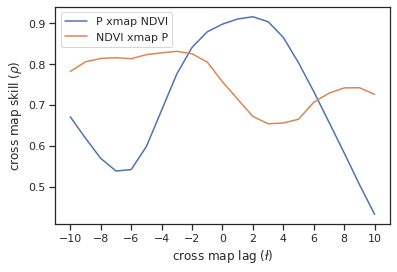

In [61]:
fig = plt.figure()
plt.plot(ccm_delays_crop_rain_ndvi_p.tp, ccm_delays_crop_rain_ndvi_p['P xmap NDVI'], label = 'P xmap NDVI')
plt.plot(ccm_delays_crop_rain_ndvi_p.tp, ccm_delays_crop_rain_ndvi_p['NDVI xmap P'], label = 'NDVI xmap P')
plt.xticks(np.arange(-10,11, 2.0))
plt.xlabel('cross map lag ($\l$)')
plt.ylabel('cross map skill ($ρ$)')
plt.legend()

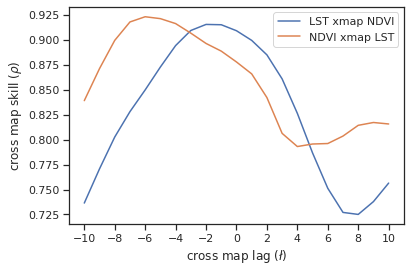

In [71]:
fig = plt.figure()
plt.plot(ccm_delays_crop_rain_ndvi_lst.tp, ccm_delays_crop_rain_ndvi_lst['LST xmap NDVI'], label = 'LST xmap NDVI')
plt.plot(ccm_delays_crop_rain_ndvi_lst.tp, ccm_delays_crop_rain_ndvi_lst['NDVI xmap LST'], label = 'NDVI xmap LST')
plt.xticks(np.arange(-10,11, 2.0))
plt.xlabel('cross map lag ($\l$)')
plt.ylabel('cross map skill ($ρ$)')
plt.legend()

In [30]:
ccm_result = CCM(pathIn = EAST_AFRICA_FINAL, dataFile = 'eastafrica_ea_full_broadleaf_open_5.csv', E = 6, Tp = 0, libSizes = '10 550 20', sample = 100, columns = 'P', target = 'NDVI', verbose = True, showPlot = False)


In [31]:
ccm_result

,LibSize,P:NDVI,NDVI:P
0,10.0,0.921213,0.572640
1,30.0,0.936497,0.717755
2,50.0,0.939949,0.746197
3,70.0,0.940712,0.755861
4,90.0,0.941451,0.760879
5,110.0,0.941710,0.765044
6,130.0,0.942454,0.767312
7,150.0,0.942687,0.768605
8,170.0,0.942779,0.769976
9,190.0,0.942787,0.770991


In [44]:
ccm_result.iloc[-1,2]

0.7796537786291988